# Fruit Multi-Classifier pt. 2 Deployment

In this blog, we will deploy our model into Hugging Face Space using gradio. I have written a detailed [blog](https://galopyz.github.io/delicious-nbdev/blog/posts/2022-11-11-alien-vs.-ghost-pt2/) here on how to deploy. This blog omits some steps.

![Image of an apple, a pear, and an orange](apple_and_pear_and_orange.jpg "Apple, Pear, and Orange")

So, we first need to install gradio. 

In [1]:
!pip install gradio

We import fastai and gradio. We also need `get_y` function that we used for datablock to train our model.

In [2]:
#| export
from fastai.vision.all import *
import gradio as gr

def get_y(path):
    return parent_label(path).split(' and ')

And we load our learner and check if everything works the same way as it did.

In [3]:
#| export
learn = load_learner('export.pkl')

In [4]:
learn.dls.vocab

['apple', 'orange', 'pear', 'random images']

In [5]:
path = Path()
path.ls()

(#17) [Path('app.py'),Path('apple.jpg'),Path('random images.jpg'),Path('apple and orange.jpg'),Path('flagged'),Path('Deployment.ipynb'),Path('export.pkl'),Path('apple and pear.jpg'),Path('pear and orange.jpg'),Path('orange.jpg')...]

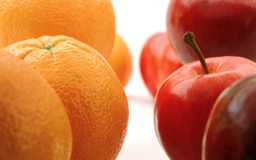

In [6]:
im = PILImage.create(path/'apple and orange.jpg')
im.to_thumb(256, 256)

In [7]:
learn.predict(im)

((#2) ['apple','orange'],
 TensorBase([ True,  True, False, False]),
 TensorBase([0.9994, 0.9993, 0.0043, 0.0011]))

Looks like it's doing good as we trained it.

Next, we want to get the vocab as categories to predict and use our learner to predict based on an input image. 

In [8]:
#|export
categories = learn.dls.vocab
def classify_images(img):
    """classifies images and returns the probabilities on each categories."""
    pred, pred_idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [9]:
classify_images(im)

{'apple': 0.9994100332260132,
 'orange': 0.9992908239364624,
 'pear': 0.004278946202248335,
 'random images': 0.0011345148086547852}

This is how we create gradio interface and try it before deploying into Hugging Face Space. 

In [10]:
#|export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
# If you have more or less examples, edit this list.
examples = ['apple.jpg', 'orange.jpg', 'apple and orange.jpg', 
            'pear and orange.jpg', 'apple and pear.jpg', 'apple and pear and orange.jpg',
            'random images.jpg']

inf = gr.Interface(fn=classify_images, inputs=image, outputs=label, examples=examples)
inf.launch(inline=False)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


And we will use `nbdev` to turn our notebook into a python script. By using `nbdev`, we do not have to copy and paste each cell into a file.

In [11]:
import nbdev

In [14]:
nbdev.export.nb_export('Deployment.ipynb', '.', name='app')

In [15]:
!cat app.py

# AUTOGENERATED! DO NOT EDIT! File to edit: Deployment.ipynb.

# %% auto 0
__all__ = ['learn', 'categories', 'image', 'label', 'examples', 'inf', 'get_y', 'classify_images']

# %% Deployment.ipynb 2
from fastai.vision.all import *
import gradio as gr

def get_y(path):
    return parent_label(path).split(' and ')

# %% Deployment.ipynb 3
learn = load_learner('export.pkl')

# %% Deployment.ipynb 8
categories = learn.dls.vocab
def classify_images(img):
    """classifies images and returns the probabilities on each categories."""
    pred, pred_idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

# %% Deployment.ipynb 10
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
# If you have more or less examples, edit this list.
examples = ['apple.jpg', 'orange.jpg', 'apple and orange.jpg', 
            'pear and orange.jpg', 'apple and pear.jpg', 'apple and pear and orange.jpg',
            'random images.jpg']

inf = gr.Interface(fn=classify_im

That's it. To find out next steps, check out my detailed [blog](https://galopyz.github.io/delicious-nbdev/blog/posts/2022-11-11-alien-vs.-ghost-pt2/) after nbdev. It goes over creating a `requirements.txt` file and uploading files into Hugging Face Space using git.